## Логистическая регрессия

Text(0, 0.5, 'ширина лепестка [стандартизированная]')

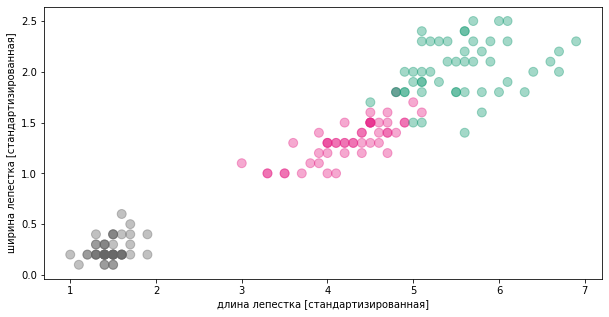

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


ds_iris = load_iris()
X = ds_iris.data[:,[2,3]]
y = ds_iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], 
            c=ds_iris.target, cmap='Dark2_r', s=80, alpha=0.4)
plt.xlabel('длина лепестка [стандартизированная]')
plt.ylabel('ширина лепестка [стандартизированная]')

In [2]:
from sklearn.model_selection import GridSearchCV


log_r = LogisticRegression(random_state=0)
pg = {'C': [10**i for i in np.arange(-4, 4, dtype=float)]}
grid = GridSearchCV(estimator=log_r,
                    param_grid=pg,
                    cv=10,
                    scoring='accuracy')
grid.fit(X_train_std, y_train)
print('Лучший параметр С: ', grid.best_params_)
print('Лучшая оценка: %.3f' % grid.best_score_)
log_r = grid.best_estimator_

Лучший параметр С:  {'C': 1.0}
Лучшая оценка: 0.953


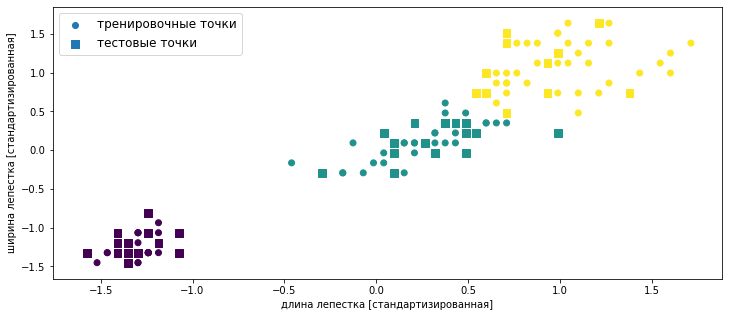

In [3]:
log_r_model = log_r.fit(X_train_std, y_train)

y_test_pred = log_r_model.predict(X_test_std)
y_train_pred = log_r_model.predict(X_train_std)
plt.figure(figsize=(12,5))
plt.scatter(X_train_std[:,0], X_train_std[:,1], 
            c=y_train_pred, marker='o', label='тренировочные точки')
plt.scatter(X_test_std[:,0], X_test_std[:,1], 
            c=y_test_pred, marker='s', s=60, label='тестовые точки')

plt.xlabel('длина лепестка [стандартизированная]')
plt.ylabel('ширина лепестка [стандартизированная]')
plt.legend(loc='upper left', prop={'size': 12})

In [4]:
print('Accuracy train_data: %.3f' % accuracy_score(y_train, y_train_pred))
print('Accuracy test_data: %.3f' % accuracy_score(y_test, y_test_pred))

Accuracy train_data: 0.952
Accuracy test_data: 0.956


In [5]:
log_r_model.predict_proba(X_test_std[:5,:])

array([[4.57718485e-05, 4.30250370e-02, 9.56929191e-01],
       [9.06283248e-02, 8.74468392e-01, 3.49032833e-02],
       [9.55048293e-01, 4.49459951e-02, 5.71145399e-06],
       [7.58708309e-05, 9.94253409e-02, 9.00498788e-01],
       [9.48771355e-01, 5.12213911e-02, 7.25395048e-06]])

## Метод опорных векторов (support vector machine)

In [6]:
from sklearn.svm import SVC


svm = SVC(random_state=0)
pg = {'C': [10**i for i in np.arange(-4, 4, dtype=float)], 'kernel': ('linear', 'rbf')}
grid = GridSearchCV(estimator=svm,
                    param_grid=pg,
                    cv=10,
                    scoring='accuracy')
grid.fit(X_train_std, y_train)
print('Лучшие параметры модели: ', grid.best_params_)
print('Лучшая оценка: %.3f' % grid.best_score_)
svm = grid.best_estimator_

Лучшие параметры модели:  {'C': 0.1, 'kernel': 'linear'}
Лучшая оценка: 0.953


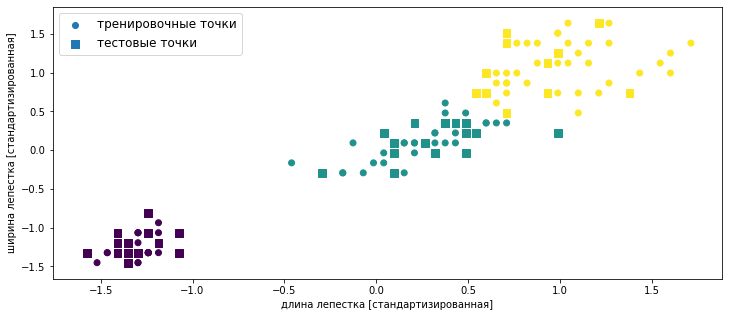

In [7]:
svm_model = svm.fit(X_train_std, y_train)
y_test_pred = svm_model.predict(X_test_std)
y_train_pred = svm_model.predict(X_train_std)

plt.figure(figsize=(12,5))
plt.scatter(X_train_std[:,0], X_train_std[:,1], 
            c=y_train_pred, marker='o', label='тренировочные точки')
plt.scatter(X_test_std[:,0], X_test_std[:,1], 
            c=y_test_pred, marker='s', s=60, label='тестовые точки')

plt.xlabel('длина лепестка [стандартизированная]')
plt.ylabel('ширина лепестка [стандартизированная]')
plt.legend(loc='upper left', prop={'size': 12})

In [8]:
print('Accuracy train_data: %.3f' % accuracy_score(y_train, y_train_pred))
print('Accuracy test_data: %.3f' % accuracy_score(y_test, y_test_pred))

Accuracy train_data: 0.952
Accuracy test_data: 0.956


Модели логистической регрессии и SVM показали одинаковые результаты на представленном наборе данных.